# MCSE Assignment-3

### Task-2: Case Study Assignment

SRN: `PES2UG23CS368`

#### Perform data analysis on the suicides dataset and answer the following question:

1. Calculate confidence interval for df[‘suicides_no’] using the z-test and show that it captures the true population mean.
2. Use df[‘suicides_no’] as population and a sample of suicides in “Albania’ and test whether the average number of suicides in Albania differs from the population using the one-sample t-test method.
3. Use df[‘suicides_no’] as population and samples of ‘Generation Z’ and ‘Boomers’ and perform a two-sample t-test.
4. Perform data analysis on a subset of the suicides dataset where df[‘country’] == "Cuba" and answer the following question:
- Visualize the scatter plot for ‘suicides_no’ vs ‘suicides/100k pop’.
- Build a linear regression model for x=’suicides_no’, y=’suicides/100k pop’; and find the y-intercept and coefficients for the model.
- Use the linear regression model to perform predictions.
- Use the model to calculate R-squared, and find the RMSE.
- Plot the regression line on the scatter plot of ‘suicides_no’ vs ‘suicides/100k pop’.


In [1]:
# import pips
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/suicides.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### Calculate confidence interval for df[‘suicides_no’] using the z-test and show that it captures the true population mean.

In [3]:
def calculate_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    n = len(data)
    z_score = norm.ppf(1 - (1 - confidence) / 2)
    margin_of_error = z_score * (std_dev / np.sqrt(n))
    return mean - margin_of_error, mean + margin_of_error

suicides_no_ci = calculate_confidence_interval(df['suicides_no'])

print(f"95% Confidence Interval for 'suicides_no': ({suicides_no_ci[0]:.2f}, {suicides_no_ci[1]:.2f})")


95% Confidence Interval for 'suicides_no': (231.97, 253.17)


### 2. Use df[‘suicides_no’] as population and a sample of suicides in “Albania’ and test whether the average number of suicides in Albania differs from the population using the one-sample t-test method.

In [4]:
population_mean = np.mean(df['suicides_no'])
albania_suicides = df[df['country'] == 'Albania']['suicides_no']

t_stat, p_value = ttest_1samp(albania_suicides, population_mean)
print(f"One-sample t-test for Albania suicides: t-statistic = {t_stat}, p-value = {p_value}")


One-sample t-test for Albania suicides: t-statistic = -454.01451793275834, p-value = 0.0


### 3. Use df[‘suicides_no’] as population and samples of ‘Generation Z’ and ‘Boomers’ and perform a two-sample t-test.


In [5]:
gen_z_suicides = df[df['generation'] == 'Generation Z']['suicides_no']
boomers_suicides = df[df['generation'] == 'Boomers']['suicides_no']

t_stat_two_sample, p_value_two_sample = ttest_ind(gen_z_suicides, boomers_suicides)
print(f"Two-sample t-test (Generation Z vs Boomers): t-statistic = {t_stat_two_sample}, p-value = {p_value_two_sample}")

Two-sample t-test (Generation Z vs Boomers): t-statistic = -11.360399282322078, p-value = 1.2564417247113515e-29


### 4. Perform data analysis on a subset of the suicides dataset where df[‘country’] == "Cuba" and answer the following question:


Visualize the scatter plot for ‘suicides_no’ vs ‘suicides/100k pop’.

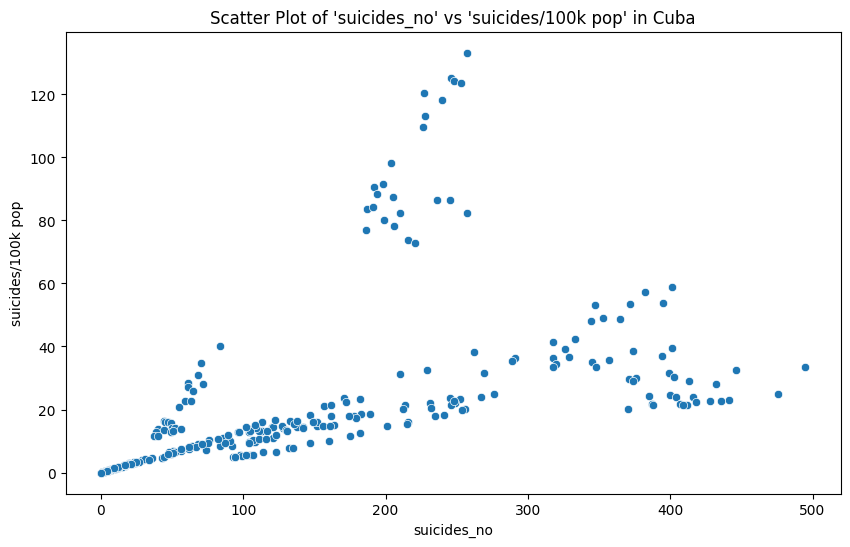

In [6]:
cuba_df = df[df['country'] == 'Cuba']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cuba_df, x='suicides_no', y='suicides/100k pop')
plt.title("Scatter Plot of 'suicides_no' vs 'suicides/100k pop' in Cuba")
plt.xlabel("suicides_no")
plt.ylabel("suicides/100k pop")
plt.show()

Build a linear regression model for x=’suicides_no’, y=’suicides/100k pop’; and find the y-intercept and coefficients for the model.

In [7]:
X = cuba_df[['suicides_no']].values
y = cuba_df['suicides/100k pop'].values

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coefficient = model.coef_[0]
print(f"Linear Regression Model: y = {intercept:.2f} + {coefficient:.2f}*x")

Linear Regression Model: y = 5.70 + 0.11*x


Use the linear regression model to perform predictions. Use the model to calculate R-squared, and find the RMSE.

In [8]:
y_pred = model.predict(X)

r_squared = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"R-squared: {r_squared:.2f}")
print(f"RMSE: {rmse:.2f}")

R-squared: 0.28
RMSE: 22.24


Plot the regression line on the scatter plot of ‘suicides_no’ vs ‘suicides/100k pop’.

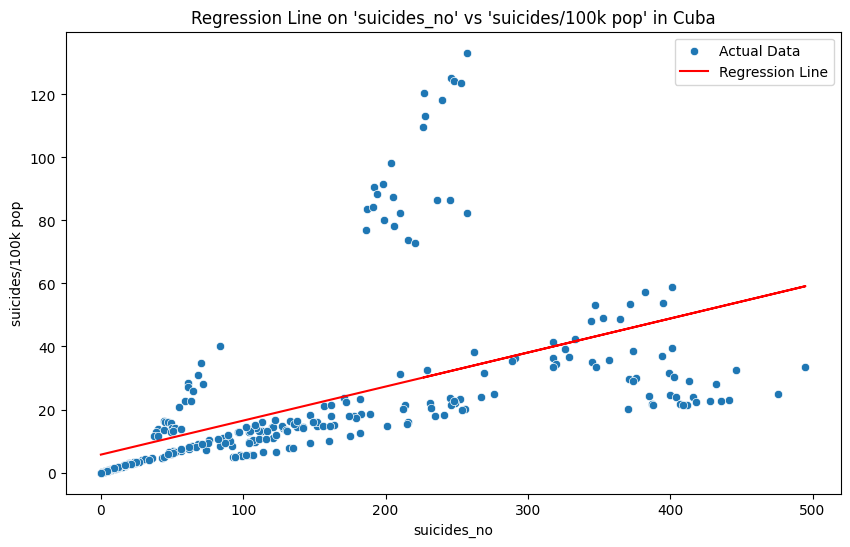

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cuba_df, x='suicides_no', y='suicides/100k pop', label="Actual Data")
plt.plot(cuba_df['suicides_no'], y_pred, color='red', label="Regression Line")
plt.title("Regression Line on 'suicides_no' vs 'suicides/100k pop' in Cuba")
plt.xlabel("suicides_no")
plt.ylabel("suicides/100k pop")
plt.legend()
plt.show()